#Worksheet4

##Problem- 1: Perform a classification task with knn from scratch.

In [17]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# 1. Load the Dataset

# Load dataset
data = pd.read_csv("medical_students_dataset.csv")

SAMPLE_SIZE = 5000
data = data.sample(n=SAMPLE_SIZE, random_state=42).reset_index(drop=True)
print(f"Using {SAMPLE_SIZE} records for faster computation")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(data.head())

# Check data types
print("\nData types:")
print(data.dtypes)

# Check missing values
print("\nMissing values count:")
print(data.isnull().sum())

# Check summary statistics
print("\nSummary statistics for numerical columns:")
print(data.describe())

# 2. Handle Missing Data

df = data.copy()

# Drop Student ID if exists
if "Student ID" in df.columns:
    df = df.drop(columns=["Student ID"])

# Handle missing values based on percentage
for column in df.columns:
    missing_pct = (df[column].isnull().sum() / len(df)) * 100

    if missing_pct > 10:
        if df[column].dtype in ['int64', 'float64']:
            df[column] = df[column].fillna(df[column].mean())
            print(f"Filled missing values in '{column}' with mean ({missing_pct:.1f}% missing)")
        else:
            df[column] = df[column].fillna(df[column].mode()[0])
            print(f"Filled missing values in '{column}' with mode ({missing_pct:.1f}% missing)")
    else:
        df = df.dropna(subset=[column])
        print(f"Dropped rows with missing values in '{column}' ({missing_pct:.1f}% missing)")

print(f"\nMissing values after handling: {df.isnull().sum().sum()}")

# 3. Feature Engineering


# Encode Diabetes (Yes=1, No=0)
df["Diabetes_encoded"] = df["Diabetes"].map({"Yes": 1, "No": 0})

# Separate feature matrix (X) and target variable (y)
# Select only numerical features
X = df.select_dtypes(include=[np.number]).drop(columns=['Diabetes_encoded'], errors='ignore').values
y = df["Diabetes_encoded"].values

print(f"Feature matrix X shape: {X.shape}")
print(f"Target vector y shape: {y.shape}")
print(f"\nClass distribution:")
print(f"Diabetes (1): {y.sum()} samples")
print(f"No Diabetes (0): {len(y) - y.sum()} samples")


# 4. Train-Test Split from Scratch


def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


# 5. Implement KNN from Scratch

# Euclidean distance function
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# KNN predict for single query
def knn_predict_single(query, X_train, y_train, k=3):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(query, X_train[i])
        distances.append((dist, y_train[i]))

    # Sort by distance and get k nearest neighbors
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]

    # Count class occurrences
    class_counts = {}
    for _, label in neighbors:
        class_counts[label] = class_counts.get(label, 0) + 1

    # Return majority class
    return max(class_counts, key=class_counts.get)

# KNN predict for all test samples
def knn_predict(X_test, X_train, y_train, k=3):
    predictions = []
    for i in range(len(X_test)):
        pred = knn_predict_single(X_test[i], X_train, y_train, k)
        predictions.append(pred)
    return np.array(predictions)

# Compute accuracy function
def compute_accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return (correct / len(y_true)) * 100

# Test KNN on a small sample first
print("\nTesting KNN on first 5 test samples:")
X_test_sample = X_test[:5]
y_test_sample = y_test[:5]
predictions_sample = knn_predict(X_test_sample, X_train, y_train, k=3)
print(f"Predictions: {predictions_sample}")
print(f"Actual:      {y_test_sample}")
print(f"Sample accuracy: {compute_accuracy(y_test_sample, predictions_sample):.2f}%")

# Predict on entire test set
print("\nPredicting on entire test set (k=3)...")
predictions = knn_predict(X_test, X_train, y_train, k=3)
accuracy = compute_accuracy(y_test, predictions)
print(f"Accuracy of KNN model (k=3): {accuracy:.2f}%")


Using 5000 records for faster computation

First 5 rows of the dataset:
   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0     19738.0  31.0  Female  179.868610  54.139870        NaN  16.734258   
1     72273.0  23.0    Male  161.485349  50.041326          A  19.189451   
2     58155.0  34.0     NaN  174.798383  92.867455          B  30.394060   
3     65427.0  34.0  Female         NaN  76.559412          B  19.704432   
4     30075.0  33.0  Female  191.895627  56.587357          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0    98.427152        98.0           125.0        221.0       No     Yes  
1    98.422948        96.0           130.0        175.0      NaN      No  
2    98.947801         NaN           126.0        148.0       No      No  
3    98.665552        74.0           119.0        230.0       No     Yes  
4    97.920941        71.0           116.0        219.0       No     NaN  

Data types:
Student 

# Problem- 2- Experimentation:

In [15]:

# Scale features function
def scale_features(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    std[std == 0] = 1
    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std
    return X_train_scaled, X_test_scaled

# Scale the features
X_train_scaled, X_test_scaled = scale_features(X_train, X_test)
print("Features scaled using standardization (z-score normalization)")

# Show scaling effect
print("\nScaling comparison (first feature, first 3 samples):")
print("Original X_train:", X_train[:3, 0])
print("Scaled X_train:  ", X_train_scaled[:3, 0])

# Train KNN on scaled data
print("\nTraining KNN on scaled data (k=3)...")
predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=3)
accuracy_scaled = compute_accuracy(y_test, predictions_scaled)
print(f"Accuracy on scaled data (k=3): {accuracy_scaled:.2f}%")

print(f"Original data accuracy: {accuracy:.2f}%")
print(f"Scaled data accuracy: {accuracy_scaled:.2f}%")
print(f"Difference: {accuracy_scaled - accuracy:+.2f}%")

if accuracy_scaled > accuracy:
    print("\n Scaling improved the accuracy")
    print("Reason: KNN uses Euclidean distance which is sensitive to feature scales.")
    print("Scaling ensures all features contribute equally to distance calculations.")
elif accuracy_scaled < accuracy:
    print("\n Scaling decreased the accuracy")
    print("Possible reason: Some features had meaningful scale differences.")
else:
    print("\n○ Scaling had no effect on accuracy")
    print("Possible reason: Features were already on similar scales.")


Features scaled using standardization (z-score normalization)

Scaling comparison (first feature, first 3 samples):
Original X_train: [22. 26. 34.]
Scaled X_train:   [-0.8260179  -0.0201089   1.59170908]

Training KNN on scaled data (k=3)...
Accuracy on scaled data (k=3): 89.03%
Original data accuracy: 88.31%
Scaled data accuracy: 89.03%
Difference: +0.72%

 Scaling improved the accuracy
Reason: KNN uses Euclidean distance which is sensitive to feature scales.
Scaling ensures all features contribute equally to distance calculations.


# Problem- 3- Experimentation with k:

 1 |          83.45 |   24.426 |         82.73 |   24.828
 2 |          83.45 |   23.147 |         82.73 |   23.858
 3 |          88.31 |   23.842 |         89.03 |   27.356
 4 |          88.58 |   25.340 |         88.85 |   23.864
 5 |          90.11 |   23.788 |         90.47 |   23.932
 6 |          90.47 |   24.458 |         90.47 |   22.606
 7 |          90.74 |   23.308 |         90.65 |   23.579
 8 |          90.92 |   23.950 |         90.92 |   23.757
 9 |          91.01 |   23.560 |         90.92 |   22.870
10 |          91.01 |   23.261 |         90.92 |   24.020
11 |          91.01 |   23.788 |         90.92 |   23.864
12 |          91.01 |   23.966 |         91.01 |   23.493
13 |          91.01 |   23.062 |         91.01 |   23.753
14 |          91.01 |   23.893 |         91.01 |   23.880
15 |          91.01 |   23.989 |         91.01 |   23.800


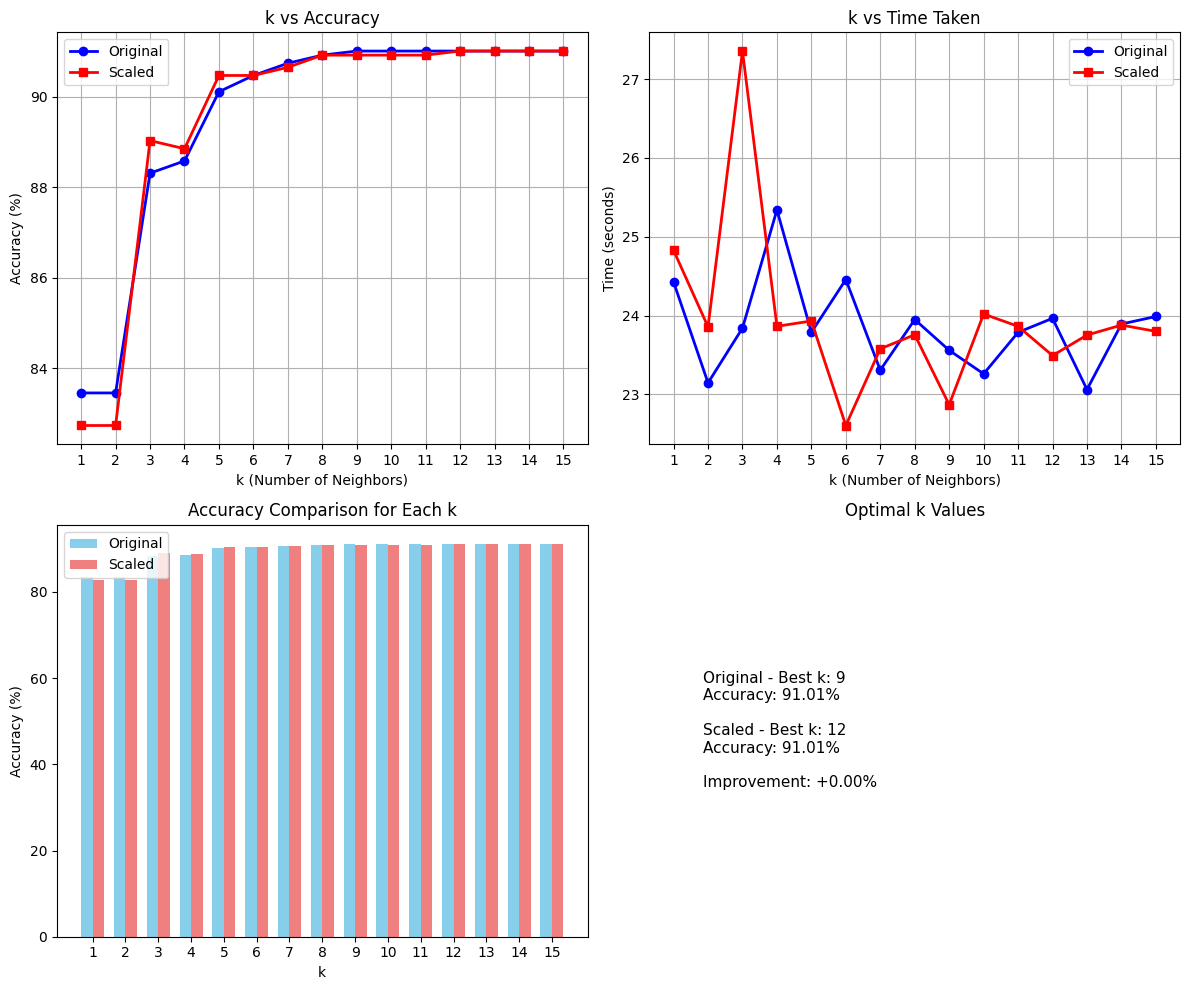

Optimal k for original data: 9 (Accuracy: 91.01%)
Optimal k for scaled data: 12 (Accuracy: 91.01%)

Effect of k on accuracy:
 Small k (1-3): High variance, may overfit
 Medium k (5-9): Good balance
 Large k (>10): High bias, may underfit

Effect of k on computational cost:
 Time increases with k (from 24.426s to 23.989s)
 More neighbors = more distance calculations


In [18]:
k_values = list(range(1, 16))
orig_accuracies = []
orig_times = []
scaled_accuracies = []
scaled_times = []


for k in k_values:
    # Original data
    start_time = time.time()
    pred_orig = knn_predict(X_test, X_train, y_train, k=k)
    time_orig = time.time() - start_time
    acc_orig = compute_accuracy(y_test, pred_orig)
    orig_accuracies.append(acc_orig)
    orig_times.append(time_orig)

    # Scaled data
    start_time = time.time()
    pred_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=k)
    time_scaled = time.time() - start_time
    acc_scaled = compute_accuracy(y_test, pred_scaled)
    scaled_accuracies.append(acc_scaled)
    scaled_times.append(time_scaled)

    print(f"{k:2d} | {acc_orig:14.2f} | {time_orig:8.3f} | {acc_scaled:13.2f} | {time_scaled:8.3f}")


# Create figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: k vs Accuracy
axes[0, 0].plot(k_values, orig_accuracies, 'b-o', label='Original', linewidth=2)
axes[0, 0].plot(k_values, scaled_accuracies, 'r-s', label='Scaled', linewidth=2)
axes[0, 0].set_xlabel('k (Number of Neighbors)')
axes[0, 0].set_ylabel('Accuracy (%)')
axes[0, 0].set_title('k vs Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 0].set_xticks(k_values)

# Plot 2: k vs Time
axes[0, 1].plot(k_values, orig_times, 'b-o', label='Original', linewidth=2)
axes[0, 1].plot(k_values, scaled_times, 'r-s', label='Scaled', linewidth=2)
axes[0, 1].set_xlabel('k (Number of Neighbors)')
axes[0, 1].set_ylabel('Time (seconds)')
axes[0, 1].set_title('k vs Time Taken')
axes[0, 1].legend()
axes[0, 1].grid(True)
axes[0, 1].set_xticks(k_values)

# Plot 3: Bar chart comparison
x_pos = np.arange(len(k_values))
width = 0.35
axes[1, 0].bar(x_pos - width/2, orig_accuracies, width, label='Original', color='skyblue')
axes[1, 0].bar(x_pos + width/2, scaled_accuracies, width, label='Scaled', color='lightcoral')
axes[1, 0].set_xlabel('k')
axes[1, 0].set_ylabel('Accuracy (%)')
axes[1, 0].set_title('Accuracy Comparison for Each k')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(k_values)
axes[1, 0].legend()

# Plot 4: Summary
axes[1, 1].axis('off')
best_k_orig = k_values[np.argmax(orig_accuracies)]
best_k_scaled = k_values[np.argmax(scaled_accuracies)]
summary_text = f"Original - Best k: {best_k_orig}\nAccuracy: {max(orig_accuracies):.2f}%\n\n"
summary_text += f"Scaled - Best k: {best_k_scaled}\nAccuracy: {max(scaled_accuracies):.2f}%\n\n"
summary_text += f"Improvement: {max(scaled_accuracies) - max(orig_accuracies):+.2f}%"
axes[1, 1].text(0.1, 0.5, summary_text, fontsize=11, verticalalignment='center')
axes[1, 1].set_title('Optimal k Values')

plt.tight_layout()
plt.show()

print(f"Optimal k for original data: {best_k_orig} (Accuracy: {max(orig_accuracies):.2f}%)")
print(f"Optimal k for scaled data: {best_k_scaled} (Accuracy: {max(scaled_accuracies):.2f}%)")
print(f"\nEffect of k on accuracy:")
print(" Small k (1-3): High variance, may overfit")
print(" Medium k (5-9): Good balance")
print(" Large k (>10): High bias, may underfit")
print(f"\nEffect of k on computational cost:")
print(f" Time increases with k (from {orig_times[0]:.3f}s to {orig_times[-1]:.3f}s)")
print(f" More neighbors = more distance calculations")


# Problem- 4- Additional Questions {Optional- But Highly Recommended}:

In [19]:

print("A. Large Datasets:")
print("   • Computational complexity: O(n²) distance calculations")
print("   • Memory intensive: Stores entire training dataset")
print("   • Slow prediction: Must compute distances to all points")
print("\nB. High-Dimensional Data (Curse of Dimensionality):")
print("   • Distances become less meaningful")
print("   • All points become approximately equidistant")
print("   • Need exponentially more data")
print("   • Irrelevant features dominate calculations")


print("A. Approximate Nearest Neighbors:")
print("   • KD-Trees for faster search (O(log n) vs O(n))")
print("   • Ball Trees for high-dimensional data")
print("   • Locality-Sensitive Hashing (LSH)")
print("\nB. Dimensionality Reduction:")
print("   • Feature selection (remove irrelevant features)")
print("   • PCA to reduce dimensions")
print("   • Autoencoders for non-linear reduction")
print("\nC. Algorithmic Improvements:")
print("   • Weighted KNN (closer neighbors have more weight)")
print("   • Parallel processing for distance calculations")
print("   • Sampling techniques (condensed nearest neighbor)")


A. Large Datasets:
   • Computational complexity: O(n²) distance calculations
   • Memory intensive: Stores entire training dataset
   • Slow prediction: Must compute distances to all points

B. High-Dimensional Data (Curse of Dimensionality):
   • Distances become less meaningful
   • All points become approximately equidistant
   • Need exponentially more data
   • Irrelevant features dominate calculations
A. Approximate Nearest Neighbors:
   • KD-Trees for faster search (O(log n) vs O(n))
   • Ball Trees for high-dimensional data
   • Locality-Sensitive Hashing (LSH)

B. Dimensionality Reduction:
   • Feature selection (remove irrelevant features)
   • PCA to reduce dimensions
   • Autoencoders for non-linear reduction

C. Algorithmic Improvements:
   • Weighted KNN (closer neighbors have more weight)
   • Parallel processing for distance calculations
   • Sampling techniques (condensed nearest neighbor)
